# Labor market during the covid-19 pandemic (Brazil, 2020)

## Demographic profile, home office, wages and gender differences

Vitor Hugo Miro - March 2021

## Investigation Overview

With the covid-19 pandemic and the social distance measures adopted by local governments, labor relations were directly affected. In this investigation, my goal is to examine how the measures affected adherence to remote work/ home office and the wages distribution. In this sense, the relationships between individual characteristics (gender, race and education), occupations and salaries were tabulated and plotted, to provide some evidence.

## Dataset Overview

The data used in this project come from the National Household Sample Survey (Pesquisa Nacional por Amostra de Domicílios - PNAD COVID19) conducted by the Brazilian Institute of Geography and Statistics (Instituto Brasileiro de Geografia e Estatística - IBGE).

The raw data consists of socioeconomic information from a sample of 349,306 people. For the analysis, we considered individuals between 15 and 65 years of age, employed and who received salaries in the reference period. With this criterion we have a sample of 106,653 workers.

In [1]:
# libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# Import data
df = pd.read_csv('PNAD_COVID_052020.csv')

In [3]:
vars = ['UF', 'A002', 'A003', 'A004', 'A005', 'C001', 'C002', 'C003', 'C007', 'C009', 'C013', 'C015', 'C01012', 'C011A12']

df = df.filter(vars, axis=1)

## rename variables
df.rename(columns={'A002':'age', 'A003':'gender', 'A004':'race', 'A005':'education',
                   'C001':'working', 'C002':'away', 'C003':'reason',
                   'C004':'paid_leave', 'C007':'labor_type', 'C009':'hours',
                   'C013': 'home_office', 'C015': 'job_search', 'C016': 'no_job_search_reason', 
                   'C01012':'habitual_wage', 'C011A12':'effective_wage'}, inplace=True)

## Demographic profile of the sample

Based on the data of the research sample, a demographic profile was elaborated featuring age, gender and declared race. Information on the education of the people interviewed is also analyzed.

Schooling was also analyzed considering the difference by gender.


In [4]:
df['gender'] = df['gender'].map({1:'male', 2:'female'}).astype("category")
df['race'] = df['race'].map({1:'white', 2:'black', 3:'yellow', 4:'brown', 5:'indigenous', 9:'ignored'}).astype("category")
df['education'] = df['education'].map({1:'illiteracy', 
                                       2:'incomplete elementary school', 
                                       3:'elementary school', 
                                       4:'incomplete high school', 
                                       5:'high school', 
                                       6:'incomplete undergraduate', 
                                       7: 'undergraduate', 
                                       8: 'graduate'}).astype("category")

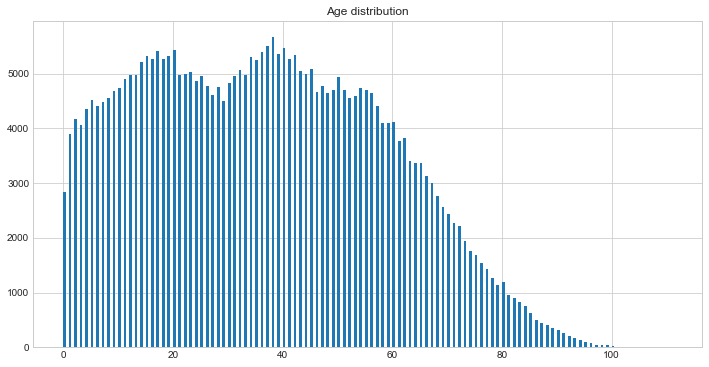

In [5]:
# plot age distribution
plt.figure(figsize = [12, 6])
bins = np.arange(0, df['age'].max()+1/2, 1/2)
plt.hist(data = df, x = 'age', bins = bins)
plt.title('Age distribution');

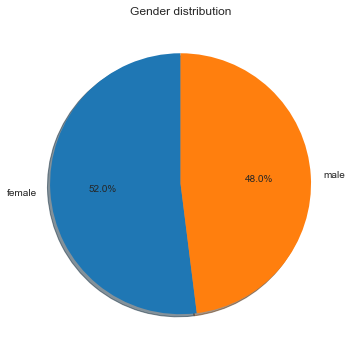

In [6]:
# Tabulate data by gender
genderdf = pd.DataFrame({'Frequency': df['gender'].value_counts(), 
                         'Proportion (%)': df['gender'].value_counts(normalize = True)*100})
# plot gender distribution
plt.figure(figsize = [12, 6])
plt.pie(genderdf['Proportion (%)'], labels = genderdf.index,
        startangle = 90, 
        shadow = True,
       autopct='%1.1f%%')
plt.title('Gender distribution')
plt.show()

The sample is well divided, with 48% men and 52% women.

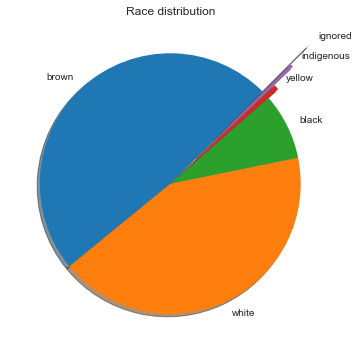

In [7]:
racedf = pd.DataFrame({'Frequency': df['race'].value_counts(), 
                         'Proportion (%)': df['race'].value_counts(normalize = True)*100})
# plot gender distribution
plt.figure(figsize = [12, 6])
plt.pie(racedf['Proportion (%)'], labels = racedf.index,
        startangle = 45, 
        shadow = True, 
        explode = (0,0,0,0.1,0.3,0.5))
plt.title('Race distribution')
plt.show()

People who claim to be brown and white represent the largest proportion of the sample. 48,4% declared themselves brown and 42,3% declared themselves white. The proportion of people who declared themselves black corresponds to 8,2% of the sample.

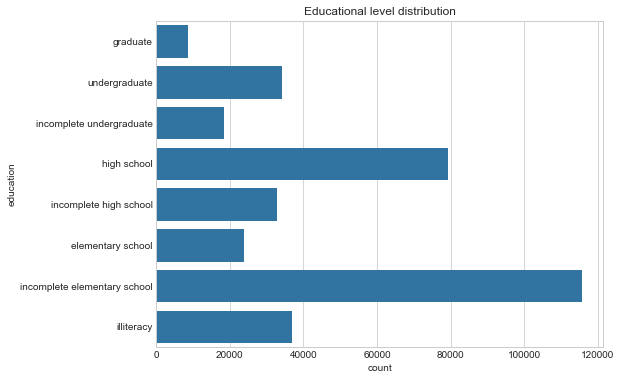

In [8]:
# Distribution of schooling
educdf = pd.DataFrame({'Frequency': df['education'].value_counts(), 
                         'Proportion (%)': df['education'].value_counts(normalize = True)*100})
# Ordered list with educational levels 
educ_levels = ['graduate', 'undergraduate', 'incomplete undergraduate', 'high school', 'incomplete high school', 
               'elementary school', 'incomplete elementary school',  'illiteracy']
# plot schooling distribution (using base color)
base_color = sns.color_palette()[0]
plt.figure(figsize = [8, 6])
sns.countplot(data=df, y='education', color=base_color, order=educ_levels)
plt.title('Educational level distribution');

This information reveals a relatively low level of education in the Brazilian sample. According to the data, 33.1% of the sample has incomplete elementary school and 22% have completed high school. In this sample, only 12.22% completed undergraduate or graduate (9.75+2.47) and 10.53% have no education level (iliteracy).

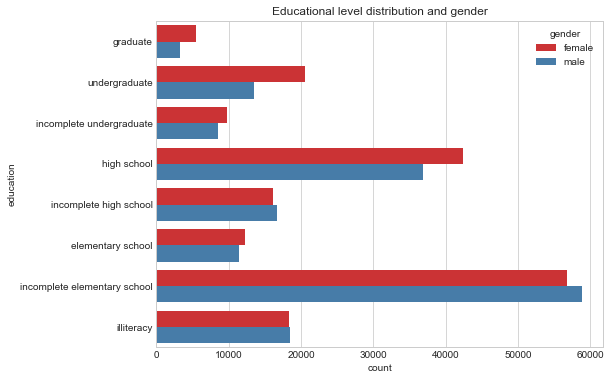

In [9]:
# plot schooling distribution by gender
plt.figure(figsize = [8, 6])
sns.countplot(data=df, y='education', hue="gender", order=educ_levels, palette="Set1")
plt.title('Educational level distribution and gender');

In this last plot we have interesting information! Women account for a higher proportion at higher levels of education.

## Labor Market

The insertion in the labor market was characterized in terms of: employed person, employed but licensed away from work, unemployed and out of the labor force.

Obviously, for information about the home office during the pandemic and the analysis of wages, only employed persons were considered.

In [10]:
# Working
df['working'] = df['working'].map({1:'yes', 2:'no'}).astype("category")

# individuals who are away (employed)
df['away'] = df['away'].map({1:'yes', 2:'no'}).astype("category")

# Job seach
df['job_search'] = df['job_search'].map({1:'yes', 2:'no'})

# status in the labor market
df.loc[df['working'] == 'yes', 'work_status'] = 'employed'
df.loc[(df['working'] == 'no') & (df['away'] == 'yes'), 'work_status'] = 'away'
df.loc[(df['working'] == 'no') & (df['away'] == 'no') & (df['job_search'] == 'yes'), 'work_status'] = 'unemployed'
df.loc[(df['working'] == 'no') & (df['away'] == 'no') & (df['job_search'] == 'no'), 'work_status'] = 'inactive'
work_status = pd.DataFrame({'Frequency': df['work_status'].value_counts(), 
                         'Proportion (%)': df['work_status'].value_counts(normalize = True)*100})

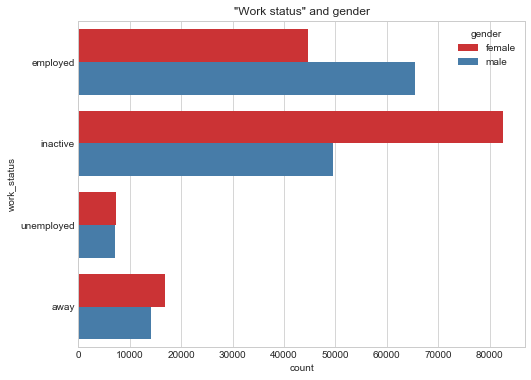

In [11]:
plt.figure(figsize = [8, 6])
sns.countplot(data=df, y='work_status', hue="gender", palette="Set1")
plt.title('"Work status" and gender');

Of the sample, 38.8% of people were not active in the labor market, either working or looking for a job; 12.2% were away from work and 5.68% were not working and were looking for work.
When considering gender, men are the majority among employees. In turn, women are the majority among the inactive and those who were away from work.

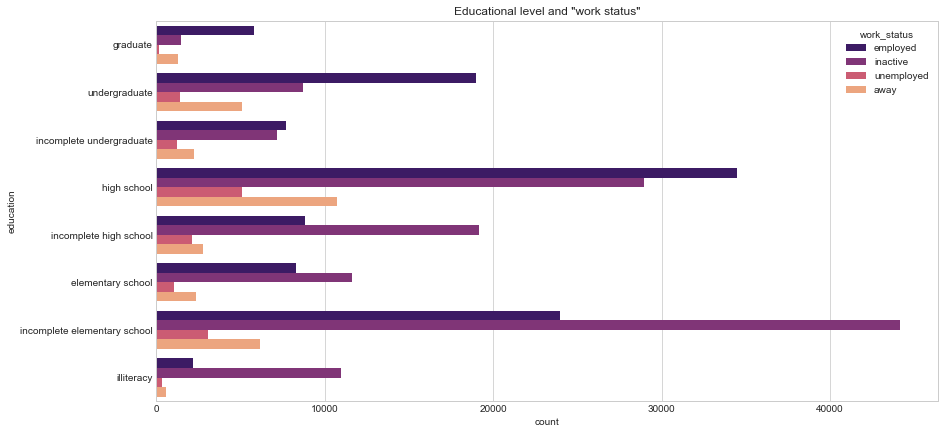

In [12]:
plt.figure(figsize = [14, 7])
sns.countplot(data=df
              , y='education', hue="work_status", order=educ_levels, palette="magma")
plt.title('Educational level and "work status"');

The plot above shows the status in the job market by education. It is observed that most of the unemployed have finished high school, few then among graduates and undergraduates. The inactive are also concentrated among those who only had high school and among those who had incomplete elementary school. In relative terms, unemployment is higher for those who have incomplete high school (6.7%) or undergraduate (6.9%) education. The highest proportion of inactive people is observed among the illiterate (64%). And the largest proportion of employees is among graduates (70.3%).

## Home Office

The work situation was analyzed, whether people were working in the workplace or home office. The objective is to assess how this coronavirus pandemic and measures of social distance have changed the labor situation in Brazil.

In [13]:
df['home_office'] = df['home_office'].map({1:'yes', 2:'no'}).astype("category")

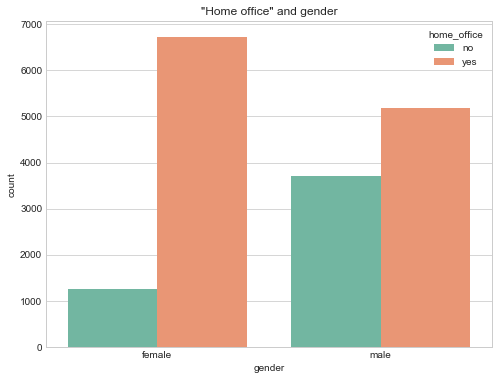

In [14]:
plt.figure(figsize = [8, 6])
sns.countplot(data=df, x='gender', hue="home_office", palette="Set2")
plt.title('"Home office" and gender');

The proportion of women who are working at home-office is higher than men.

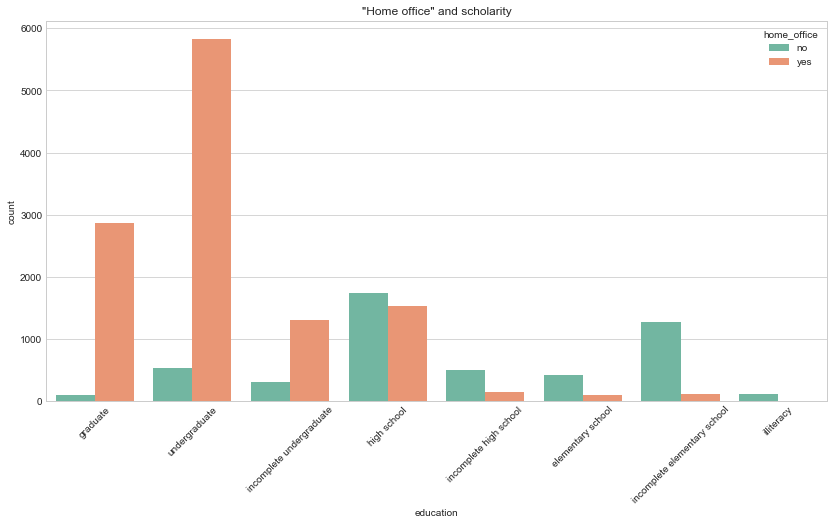

In [15]:
plt.figure(figsize = [14, 7])
sns.countplot(data=df, x='education', hue="home_office", order=educ_levels, palette="Set2")
plt.xticks(rotation=45)
plt.title('"Home office" and scholarity');

The home office is more common among the more educated.
Most graduates and undergraduates were in home office during the period of "social isolation". In turn, few workers with less education took advantage of this work regime.

## Wages

The analysis of the distribution of wages is also interesting. Wages are one of the few continuous variables in the research and their analysis allows to verify important aspects such as the distinction of wages by educational level, by type of occupation and, of course, differences by gender, which are one of the focuses of the analysis presented here .

In [16]:
df= df[(df['work_status']=='employed')]

df = df[(df['habitual_wage'] > 0) & (df['habitual_wage'] <= 7000)]
df= df[(df['effective_wage'] > 0) & (df['effective_wage'] <= 6000)]

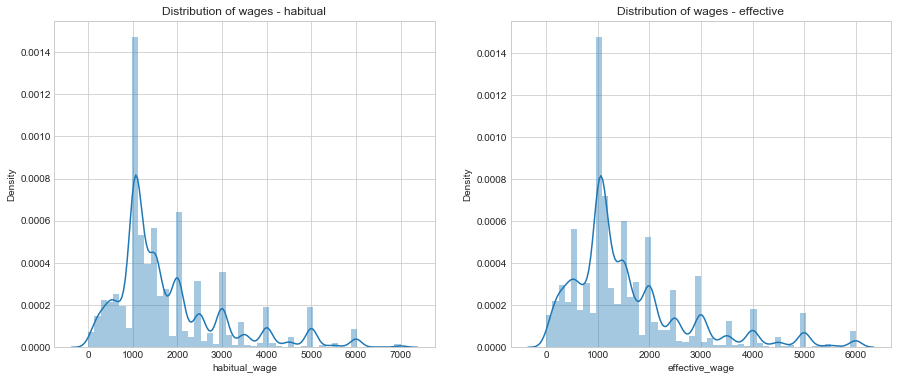

In [17]:
plt.figure(figsize = [15, 6])

plt.subplot(1, 2, 1)
sns.distplot(df['habitual_wage'])
plt.title('Distribution of wages - habitual');

plt.subplot(1, 2, 2)
sns.distplot(df['effective_wage'])
plt.title('Distribution of wages - effective');

Distribution of wages, actual and habitual, is quite asymmetrical.

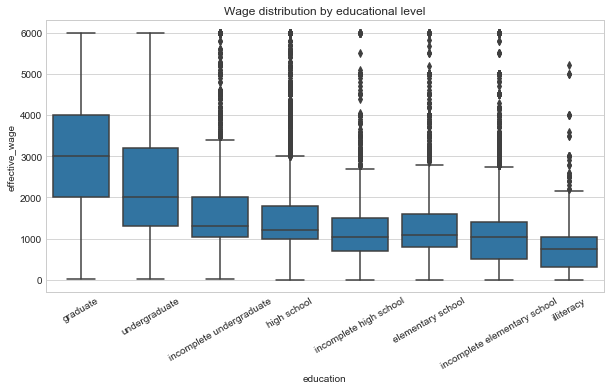

In [18]:
plt.figure(figsize = [10, 5])
sns.boxplot(data=df, x='education', y='effective_wage', order=educ_levels, color=base_color)
plt.title('Wage distribution by educational level')
plt.xticks(rotation=30);

The above plot confirms that, through the data, that more educated workers earn higher wages.

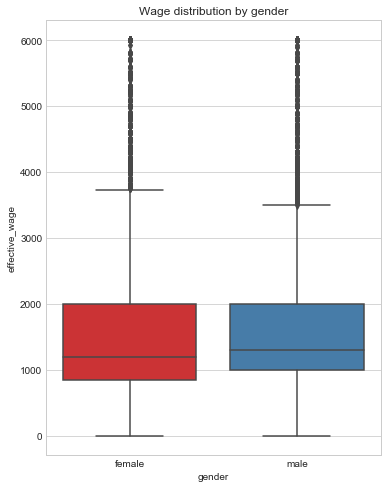

In [19]:
plt.figure(figsize = [6, 8])
sns.boxplot(data = df, x='gender', y='effective_wage', palette="Set1")
plt.title('Wage distribution by gender');

The above plot shows that the distribution of men's wages is above the median of women's wages.

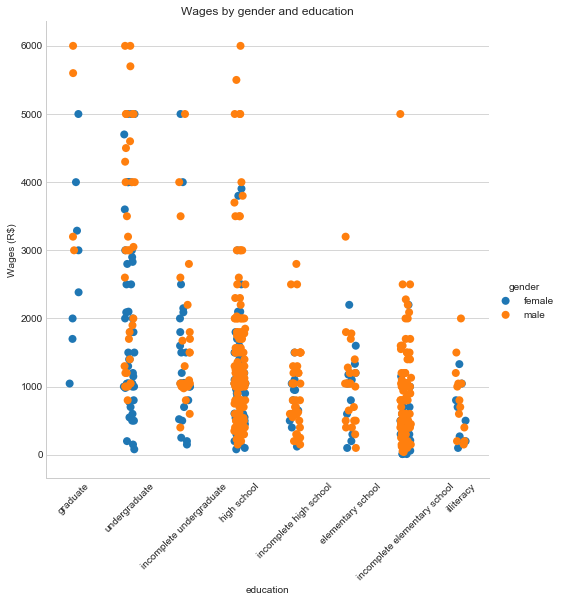

In [20]:
samples = np.random.choice(df.shape[0], 3000, replace=False)
df_sample = df.loc[df.index.intersection(samples), ]

g = sns.FacetGrid(data = df_sample, hue = 'gender', height=7)
g.map(sns.stripplot, 'education', 'effective_wage', jitter=True, size=8, order=educ_levels)
plt.title('Wages by gender and education')
g.add_legend();
plt.xticks(rotation=45)
plt.ylabel('Wages (R$)');

This last plot shows that, in general, men have better salaries (as was verified earlier). When viewing wages by educational level and by gender, the difference appears to be smaller for more educated groups (graduates and undergratuates).